In [63]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob

In [64]:
### Part 1: Create a grid representing world map (style A) with only white/navy squares included ###

# SETUP dimensions
# blocks
rows_blocks = 5
cols_blocks  = 8
squares_per_block = 16
# squares
rows = rows_blocks * squares_per_block # num of rows (squares unit) in world map
cols = cols_blocks * squares_per_block # num of cols (squares unit) in world map
# initialize grid
grid = np.zeros((rows, cols))

# PATHS to blocks and square images
block_paths = glob.glob('blocks/*')
block_paths.sort() # sorts paths from (0,0), (0,1), ... -> ..., (4,6), (4,7) 

square_paths = glob.glob('squares/*')
square_paths.sort() # sorts paths from 1, 2, .. ->  9

In [66]:
# INITIALIZE BASE COLORS
colors = []
# reads each square and pulls the main GBR color
for sq_path in square_paths:
    sq = cv2.imread(sq_path, cv2.IMREAD_COLOR) # reads image of square
    color = sq[14, 6] # gets GBR color of square at coordinate 14, 6
    colors.append(color)
    print(sq_path, " : ", color)

squares/ss_01.png  :  [255 255 255]
squares/ss_02.png  :  [81 47  0]
squares/ss_03.png  :  [204 175  18]
squares/ss_04.png  :  [139 143   0]
squares/ss_05.png  :  [ 48 152   0]
squares/ss_06.png  :  [ 17 189 152]
squares/ss_07.png  :  [133 194 222]
squares/ss_08.png  :  [  0 162 247]
squares/ss_09.png  :  [  0 106 235]
squares/ss_10.png  :  [101  96 234]


In [67]:
# takes in a square image
# returns index of color that best matches in the squares array; based on minimum difference in B G R values
def best_square(img):
    min_diff = np.Inf
    best_index = 0
    sq_color = img[17, 8]
    sq_b, sq_g, sq_r = sq_color[0], sq_color[1], sq_color[2]
    # print("square bgr:", color)
        
    # loops through each available color and sees if it matches
    for i in range(len(colors)):
        curr_color = colors[i]
        curr_b, curr_g, curr_r = curr_color[0], curr_color[1], curr_color[2]
        diff = abs(sq_b - curr_b) + abs(sq_g - curr_g) + abs(sq_r - curr_r)
        # print("total diff at index {i}:", diff)
        if diff < min_diff:
            min_diff = diff
            best_index = i + 1
    # print(best_index)
    return best_index

In [68]:
# takes in a block image
# fills the grid with the color numbers for the corresponding block
def fill_block(block_row, block_col, block):
    sq_row = 16 * block_row
    sq_col = 16 * block_col
    # avg height / width per square within block
    block_height = block.shape[0] // 16
    block_width = block.shape[1] // 16
    
    plt.imshow(block)
    plt.title("({}, {})".format(block_row, block_col))
    plt.show()
    
    # for every square in 16 x 16 block
    for r in range(squares_per_block):
        for c in range(squares_per_block):
            curr_sq = block[block_width * r : block_width * (r + 1), block_height * c : block_height * (c + 1), :]
            best_color = best_square(curr_sq)
            # plt.imshow(curr_sq)
            # plt.title("({}, {}), estimate: {}".format(block_row, block_col, best_color))
            # plt.show()
            grid[sq_row + r][sq_col + c] = best_color
    print(grid)

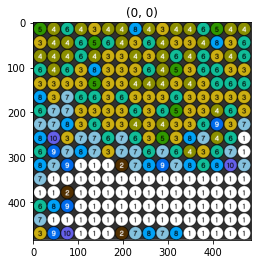

[[5. 4. 6. ... 0. 0. 0.]
 [3. 4. 4. ... 0. 0. 0.]
 [4. 4. 4. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in ubyte_scalars
  


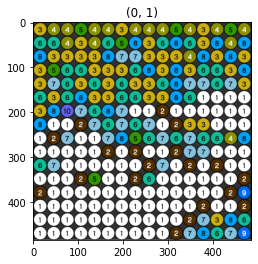

[[5. 4. 6. ... 0. 0. 0.]
 [3. 4. 4. ... 0. 0. 0.]
 [4. 4. 4. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


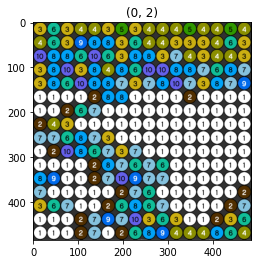

[[5. 4. 6. ... 0. 0. 0.]
 [3. 4. 4. ... 0. 0. 0.]
 [4. 4. 4. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


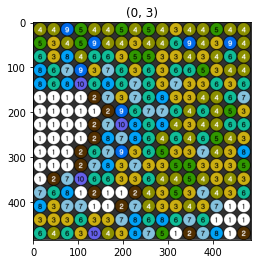

[[5. 4. 6. ... 0. 0. 0.]
 [3. 4. 4. ... 0. 0. 0.]
 [4. 4. 4. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


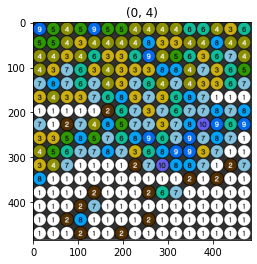

[[5. 4. 6. ... 0. 0. 0.]
 [3. 4. 4. ... 0. 0. 0.]
 [4. 4. 4. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


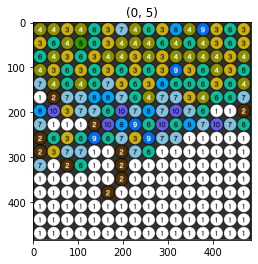

[[5. 4. 6. ... 0. 0. 0.]
 [3. 4. 4. ... 0. 0. 0.]
 [4. 4. 4. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


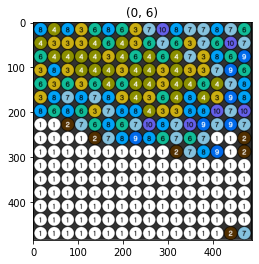

[[5. 4. 6. ... 0. 0. 0.]
 [3. 4. 4. ... 0. 0. 0.]
 [4. 4. 4. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


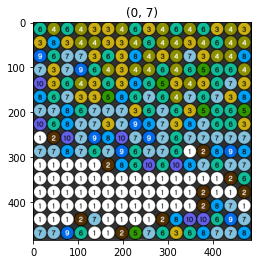

[[5. 4. 6. ... 3. 4. 3.]
 [3. 4. 4. ... 6. 4. 4.]
 [4. 4. 4. ... 4. 4. 8.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


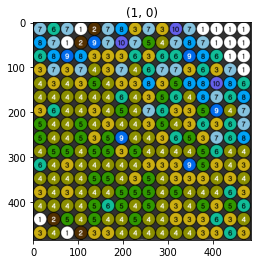

[[5. 4. 6. ... 3. 4. 3.]
 [3. 4. 4. ... 6. 4. 4.]
 [4. 4. 4. ... 4. 4. 8.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


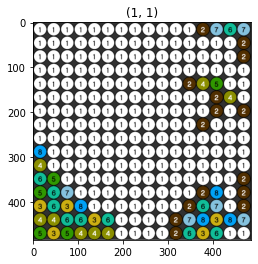

[[5. 4. 6. ... 3. 4. 3.]
 [3. 4. 4. ... 6. 4. 4.]
 [4. 4. 4. ... 4. 4. 8.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


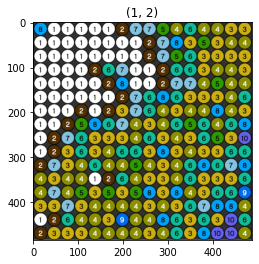

[[5. 4. 6. ... 3. 4. 3.]
 [3. 4. 4. ... 6. 4. 4.]
 [4. 4. 4. ... 4. 4. 8.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


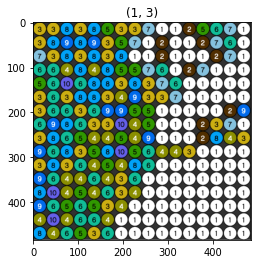

[[5. 4. 6. ... 3. 4. 3.]
 [3. 4. 4. ... 6. 4. 4.]
 [4. 4. 4. ... 4. 4. 8.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


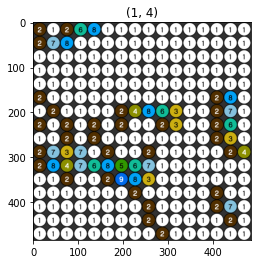

[[5. 4. 6. ... 3. 4. 3.]
 [3. 4. 4. ... 6. 4. 4.]
 [4. 4. 4. ... 4. 4. 8.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


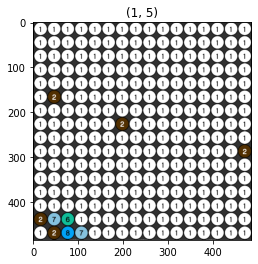

[[5. 4. 6. ... 3. 4. 3.]
 [3. 4. 4. ... 6. 4. 4.]
 [4. 4. 4. ... 4. 4. 8.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


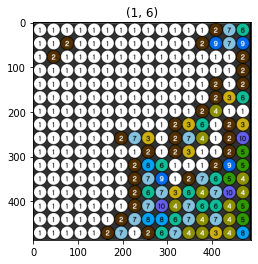

[[5. 4. 6. ... 3. 4. 3.]
 [3. 4. 4. ... 6. 4. 4.]
 [4. 4. 4. ... 4. 4. 8.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


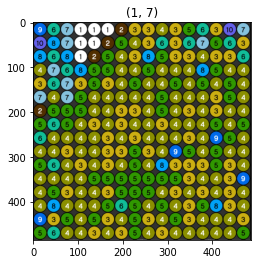

[[5. 4. 6. ... 3. 4. 3.]
 [3. 4. 4. ... 6. 4. 4.]
 [4. 4. 4. ... 4. 4. 8.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


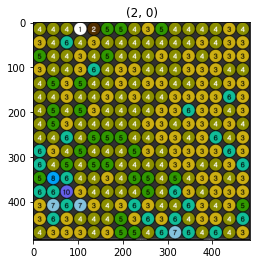

[[5. 4. 6. ... 3. 4. 3.]
 [3. 4. 4. ... 6. 4. 4.]
 [4. 4. 4. ... 4. 4. 8.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


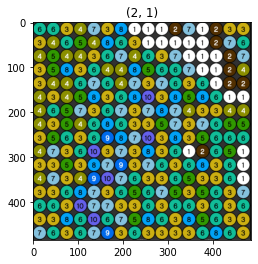

[[5. 4. 6. ... 3. 4. 3.]
 [3. 4. 4. ... 6. 4. 4.]
 [4. 4. 4. ... 4. 4. 8.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


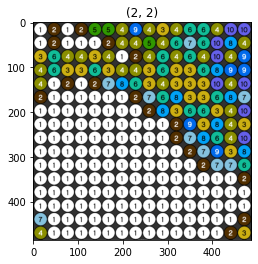

[[5. 4. 6. ... 3. 4. 3.]
 [3. 4. 4. ... 6. 4. 4.]
 [4. 4. 4. ... 4. 4. 8.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


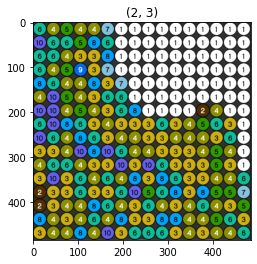

[[5. 4. 6. ... 3. 4. 3.]
 [3. 4. 4. ... 6. 4. 4.]
 [4. 4. 4. ... 4. 4. 8.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


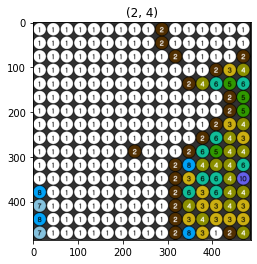

[[5. 4. 6. ... 3. 4. 3.]
 [3. 4. 4. ... 6. 4. 4.]
 [4. 4. 4. ... 4. 4. 8.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


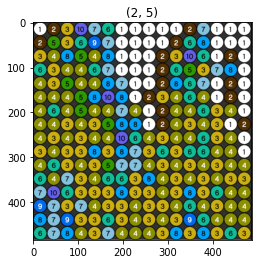

[[5. 4. 6. ... 3. 4. 3.]
 [3. 4. 4. ... 6. 4. 4.]
 [4. 4. 4. ... 4. 4. 8.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


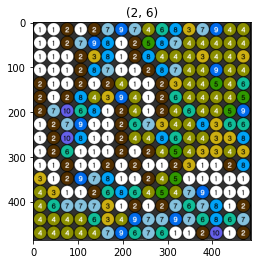

[[5. 4. 6. ... 3. 4. 3.]
 [3. 4. 4. ... 6. 4. 4.]
 [4. 4. 4. ... 4. 4. 8.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


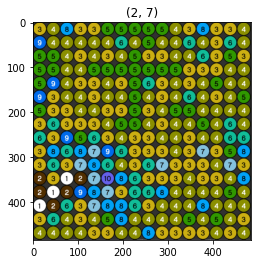

[[5. 4. 6. ... 3. 4. 3.]
 [3. 4. 4. ... 6. 4. 4.]
 [4. 4. 4. ... 4. 4. 8.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


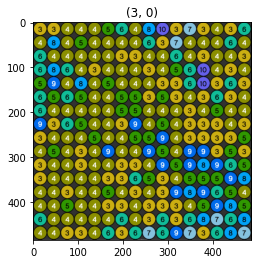

[[5. 4. 6. ... 3. 4. 3.]
 [3. 4. 4. ... 6. 4. 4.]
 [4. 4. 4. ... 4. 4. 8.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


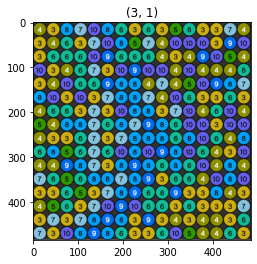

[[5. 4. 6. ... 3. 4. 3.]
 [3. 4. 4. ... 6. 4. 4.]
 [4. 4. 4. ... 4. 4. 8.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


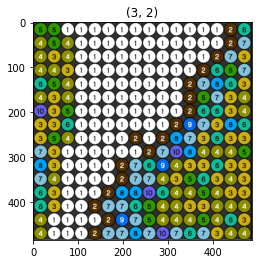

[[5. 4. 6. ... 3. 4. 3.]
 [3. 4. 4. ... 6. 4. 4.]
 [4. 4. 4. ... 4. 4. 8.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


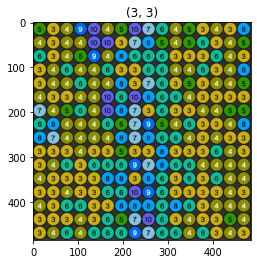

[[5. 4. 6. ... 3. 4. 3.]
 [3. 4. 4. ... 6. 4. 4.]
 [4. 4. 4. ... 4. 4. 8.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


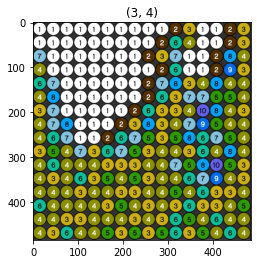

[[5. 4. 6. ... 3. 4. 3.]
 [3. 4. 4. ... 6. 4. 4.]
 [4. 4. 4. ... 4. 4. 8.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


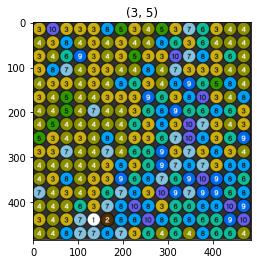

[[5. 4. 6. ... 3. 4. 3.]
 [3. 4. 4. ... 6. 4. 4.]
 [4. 4. 4. ... 4. 4. 8.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


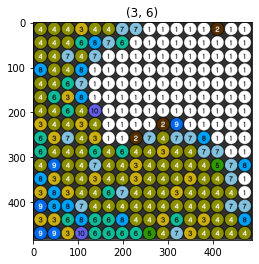

[[5. 4. 6. ... 3. 4. 3.]
 [3. 4. 4. ... 6. 4. 4.]
 [4. 4. 4. ... 4. 4. 8.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


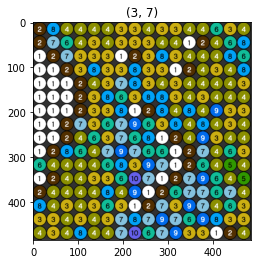

[[5. 4. 6. ... 3. 4. 3.]
 [3. 4. 4. ... 6. 4. 4.]
 [4. 4. 4. ... 4. 4. 8.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


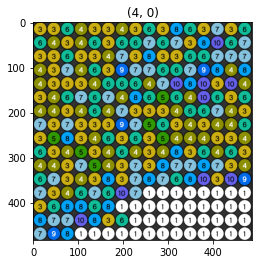

[[5. 4. 6. ... 3. 4. 3.]
 [3. 4. 4. ... 6. 4. 4.]
 [4. 4. 4. ... 4. 4. 8.]
 ...
 [3. 6. 8. ... 0. 0. 0.]
 [8. 7. 7. ... 0. 0. 0.]
 [7. 9. 8. ... 0. 0. 0.]]


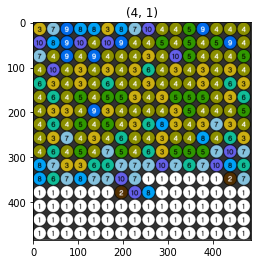

[[5. 4. 6. ... 3. 4. 3.]
 [3. 4. 4. ... 6. 4. 4.]
 [4. 4. 4. ... 4. 4. 8.]
 ...
 [3. 6. 8. ... 0. 0. 0.]
 [8. 7. 7. ... 0. 0. 0.]
 [7. 9. 8. ... 0. 0. 0.]]


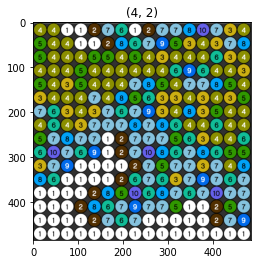

[[5. 4. 6. ... 3. 4. 3.]
 [3. 4. 4. ... 6. 4. 4.]
 [4. 4. 4. ... 4. 4. 8.]
 ...
 [3. 6. 8. ... 0. 0. 0.]
 [8. 7. 7. ... 0. 0. 0.]
 [7. 9. 8. ... 0. 0. 0.]]


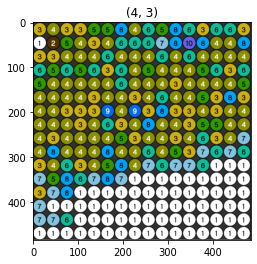

[[5. 4. 6. ... 3. 4. 3.]
 [3. 4. 4. ... 6. 4. 4.]
 [4. 4. 4. ... 4. 4. 8.]
 ...
 [3. 6. 8. ... 0. 0. 0.]
 [8. 7. 7. ... 0. 0. 0.]
 [7. 9. 8. ... 0. 0. 0.]]


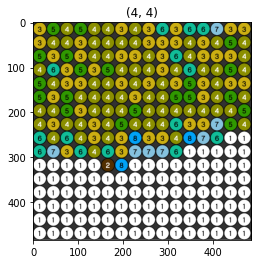

[[5. 4. 6. ... 3. 4. 3.]
 [3. 4. 4. ... 6. 4. 4.]
 [4. 4. 4. ... 4. 4. 8.]
 ...
 [3. 6. 8. ... 0. 0. 0.]
 [8. 7. 7. ... 0. 0. 0.]
 [7. 9. 8. ... 0. 0. 0.]]


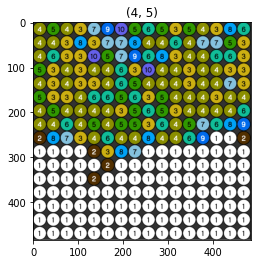

[[5. 4. 6. ... 3. 4. 3.]
 [3. 4. 4. ... 6. 4. 4.]
 [4. 4. 4. ... 4. 4. 8.]
 ...
 [3. 6. 8. ... 0. 0. 0.]
 [8. 7. 7. ... 0. 0. 0.]
 [7. 9. 8. ... 0. 0. 0.]]


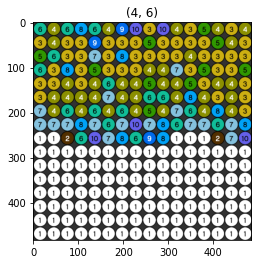

[[5. 4. 6. ... 3. 4. 3.]
 [3. 4. 4. ... 6. 4. 4.]
 [4. 4. 4. ... 4. 4. 8.]
 ...
 [3. 6. 8. ... 0. 0. 0.]
 [8. 7. 7. ... 0. 0. 0.]
 [7. 9. 8. ... 0. 0. 0.]]


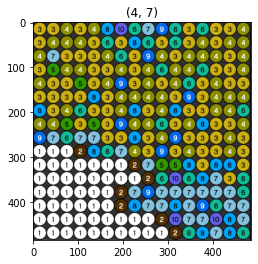

[[ 5.  4.  6. ...  3.  4.  3.]
 [ 3.  4.  4. ...  6.  4.  4.]
 [ 4.  4.  4. ...  4.  4.  8.]
 ...
 [ 3.  6.  8. ...  6.  7.  7.]
 [ 8.  7.  7. ... 10.  8.  7.]
 [ 7.  9.  8. ...  7.  8.  6.]]


In [69]:
### For each block path
for (i, b_path) in enumerate(block_paths):
    block_row = i // 8
    block_col = i % 8
    # gets block
    curr_block = cv2.imread(b_path, cv2.IMREAD_COLOR)

    fill_block(block_row, block_col, curr_block)
    # break
    

In [ ]:
### Part 2: Create ways to view the grid, block by block and the whole map ###

In [ ]:
### Part 3: Style the empty parts of the map with the remaining squares (detailed in map uilding guide) ###
